# **1. Introduction to Time-Series Analysis**

* A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.



---



---
### **Components of a Time-Series**

* **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
* **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
* **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
* **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
* **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


---


In this notebook, I conduct time series analysis of video game sales over time.




In [2]:
!pip install opendatasets --quiet

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="time-series-analysis-workbook")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/time-series-analysis-workbook


'https://jovian.ai/kartikaye-madhok/time-series-analysis-workbook'

# 2. Types of Data

As stated above, the time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:-

1. **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data.

2. **Cross sectional data** - It is the data of one or more variables recorded at the same point in time.

3. **Pooled data** - It is the combination of time series data and cross sectional data.

# 3. Time Series Terminology 


There are various terms and concepts in time series that we should know. These are as follows:-

1. **Dependence** - It refers to the association of two observations of the same variable at prior time periods.

2. **Stationarity** - It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3. **Differencing** - Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4. **Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

5. **Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6. **Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7. **ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.

# 4. Time Series Analysis

## 4.1 Importing Libraries

In [6]:
#Data Importing
import opendatasets as od
import os

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 4.2 Importing and Reading Data

In [7]:
dataset_url = 'https://www.kaggle.com/datasets/chirag19/air-passengers'

In [8]:
od.download(dataset_url)

100%|██████████| 764/764 [00:00<00:00, 296kB/s]

In [9]:
data_dir = './air-passengers'

In [10]:
os.listdir(data_dir)

['AirPassengers.csv']

In [11]:
data_df=pd.read_csv('air-passengers/AirPassengers.csv')
data_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We shall rename the column names

In [12]:
data_df.columns=['Date','No. of Passengers']
data_df.head()

,Date,No. of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 5. Visualize the Time Series

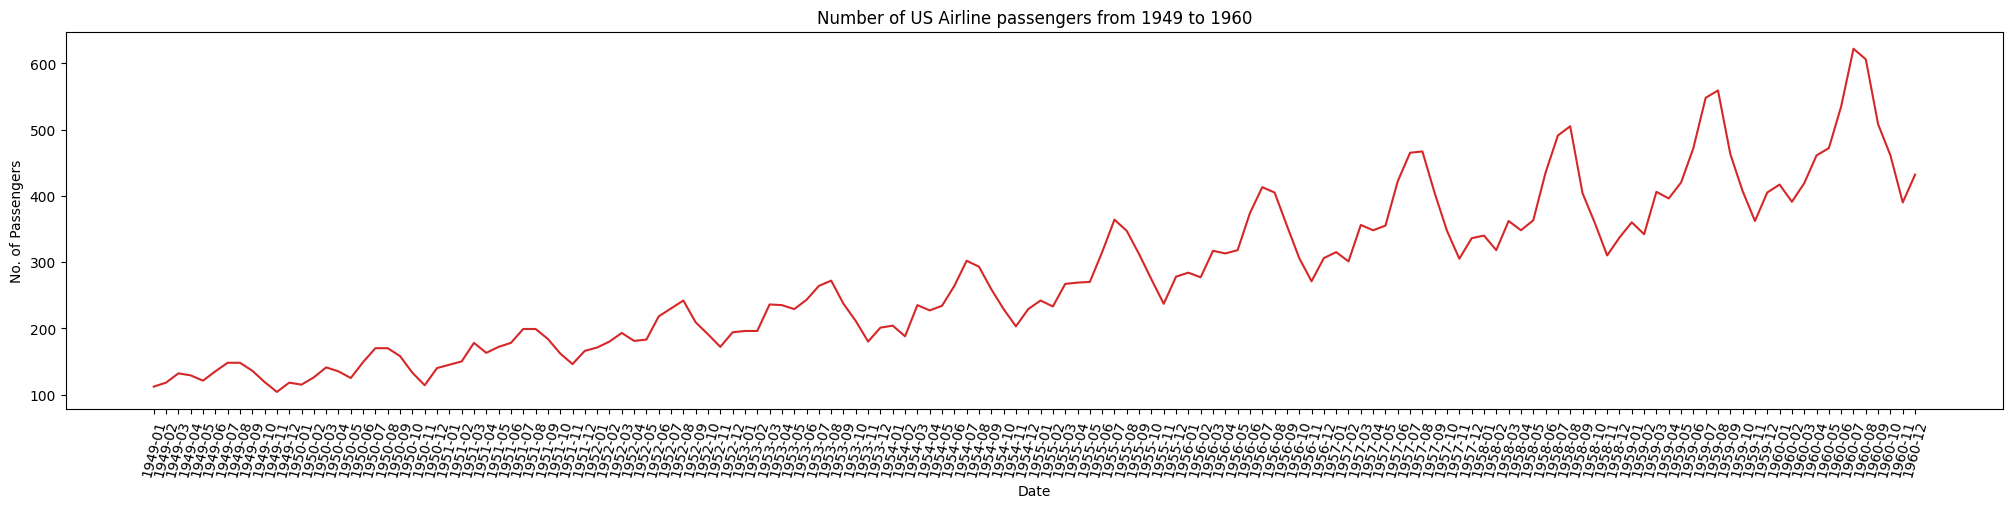

In [15]:
def plot_df(data_df, x, y, 
            title='',
            xlabel='Date',
            ylabel='No. of Passengers',
            dpi=100):
  plt.figure(figsize=(25,5), dpi=dpi)
  plt.plot(x, y, color='tab:red')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks(rotation = 75)
  plt.show()

plot_df(data_df, x=data_df['Date'], y=data_df['No. of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

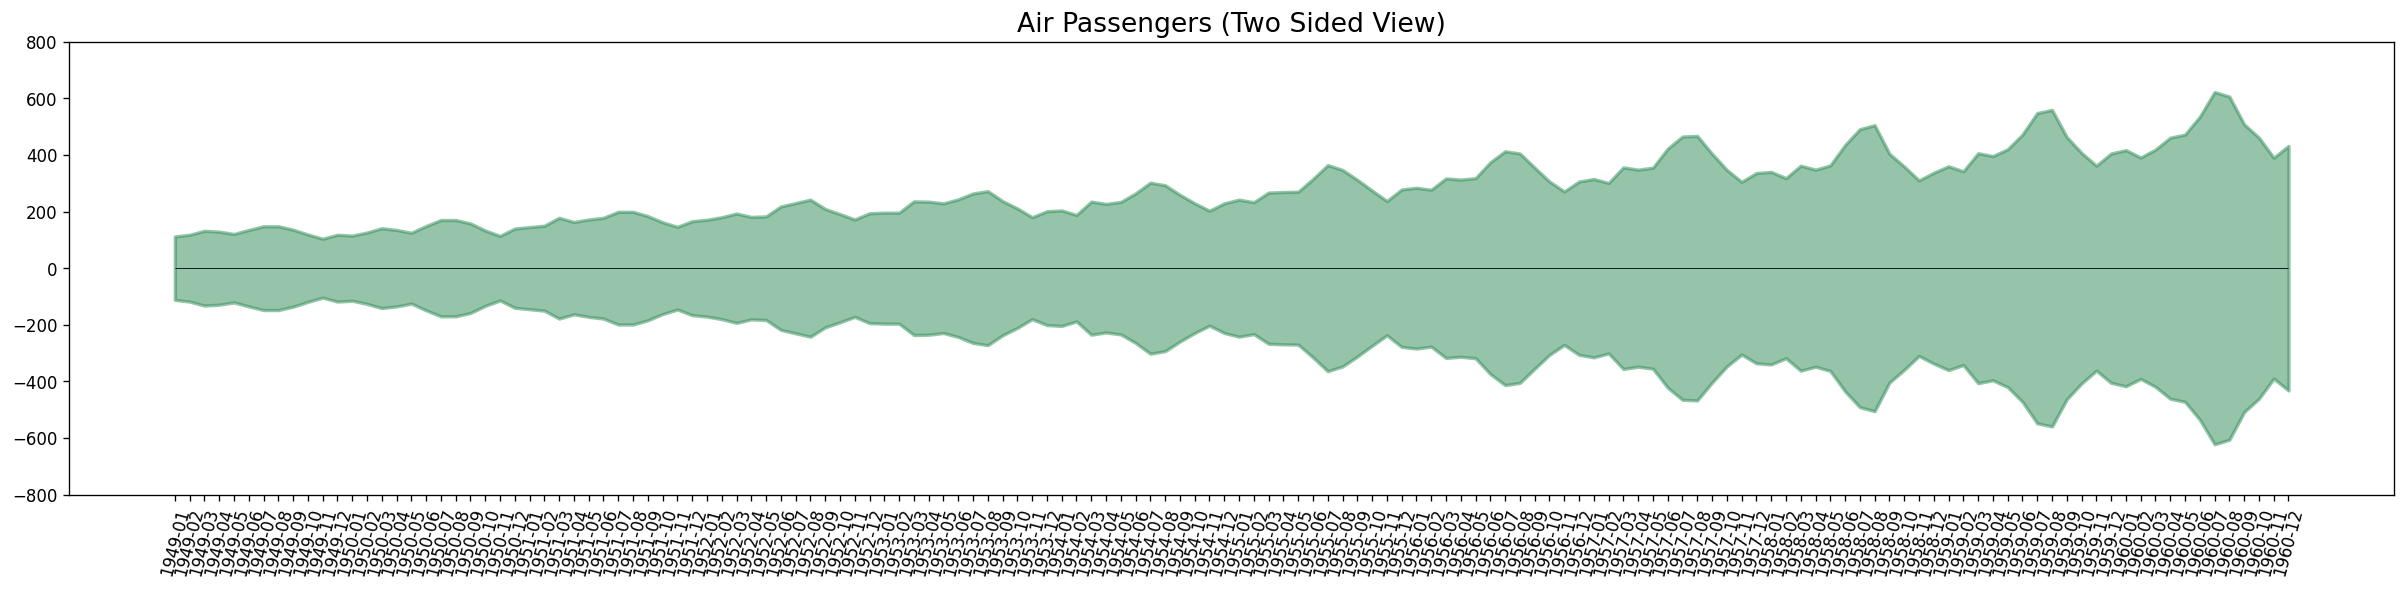

In [16]:
x=data_df['Date'].values
y1=data_df['No. of Passengers'].values

#plot
fig, ax = plt.subplots(1,1, figsize=(25,5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800,800)
plt.title('Air Passengers (Two Sided View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(data_df['Date']), xmax=np.max(data_df['Date']), linewidth=0.5)
plt.xticks(rotation = 75)
plt.show()

It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

# 6. Patterns in a Time Series

* Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.


---


**Trend**
* A trend is observed when there is an increasing or decreasing slope observed in the time series.



**Seasonality**
* A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.



---


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

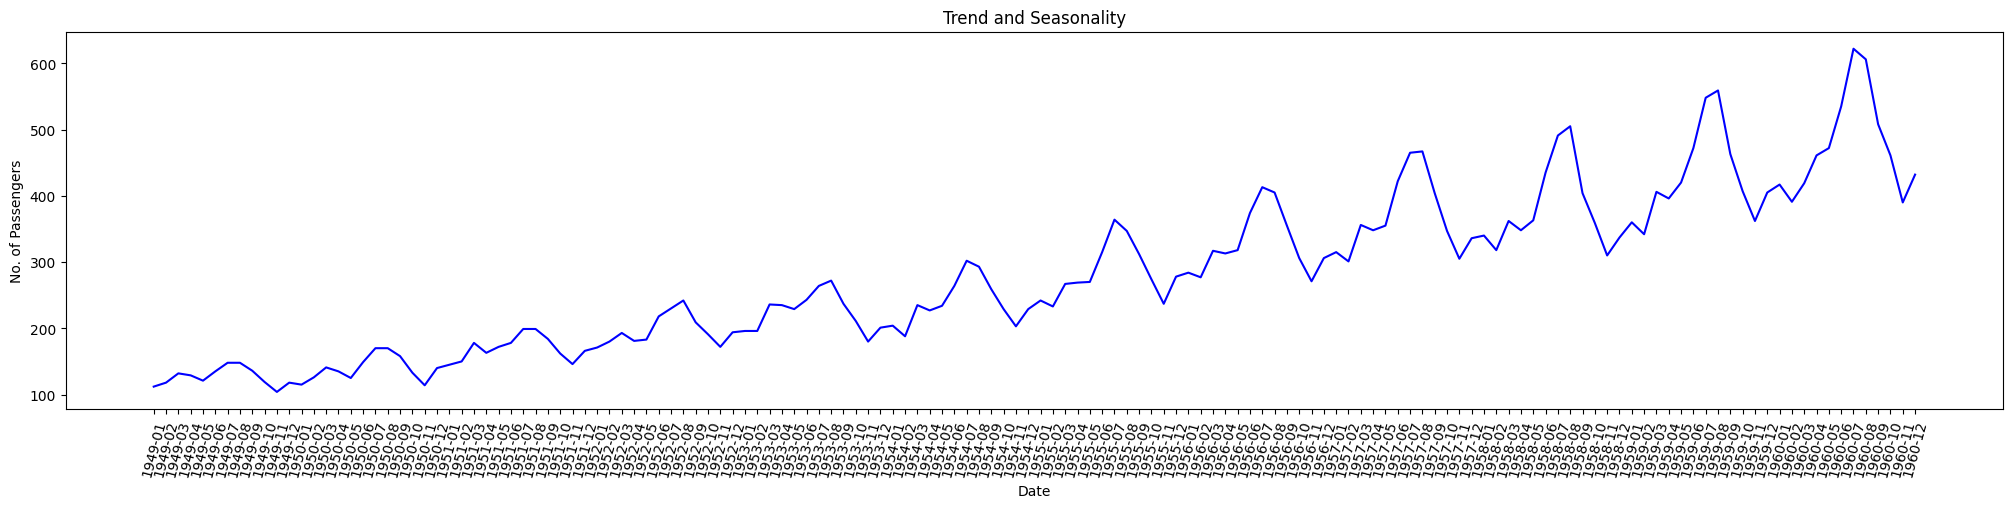

In [17]:
def plot_df(data_df, x, y, title="", xlabel='Date', ylabel='No. of Passengers', dpi=100):
    plt.figure(figsize=(25,5), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 75)
    plt.show()
    

plot_df(data_df, x=data_df['Date'], y=data_df['No. of Passengers'], title='Trend and Seasonality')

**Cyclic behaviour**
* Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

* If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# 7. Additive and Miltiplicative Time Series

* We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

**Additive time series:**

Value = Base Level + Trend + Seasonality + Error


**Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

# 8. Decomposition of a Time Series 

* Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

* The seasonal_decompose in statsmodels implements this conveniently.

In [20]:
?seasonal_decompose

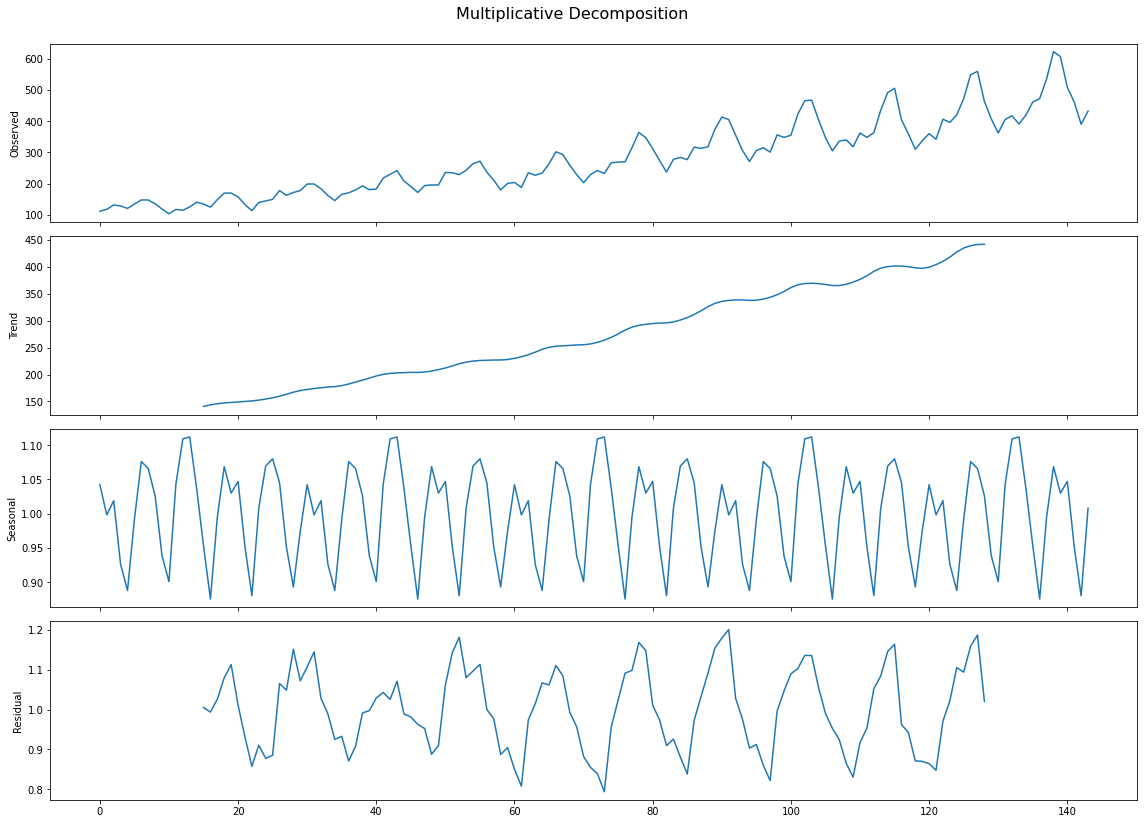

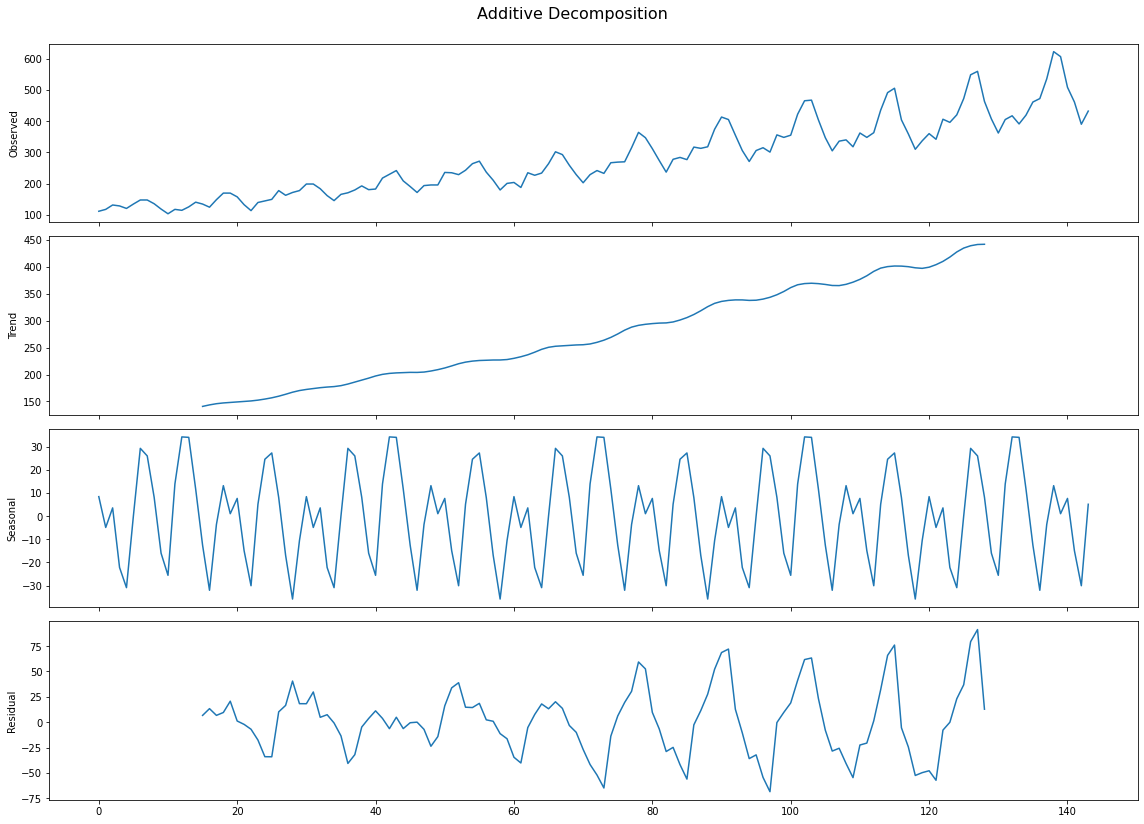

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data_df['No. of Passengers'], model='multiplicative', freq=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data_df['No. of Passengers'], model='additive', freq=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

* If we look at the residuals of the additive decomposition closely, it has some pattern left over.

* The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# 9. Stationary and Non-Stationary Time Series

* Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.

* Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.

* A stationary time series is independent of seasonal effects as well.
Now, we will plot some examples of stationary and non-stationary time series for clarity.

![]()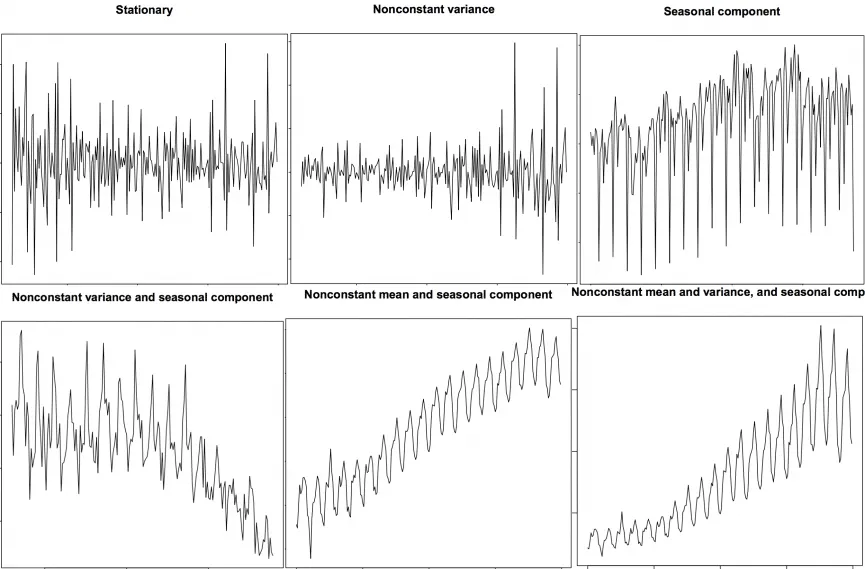

Img : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

* We can covert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

# 10. How to make a time series Stationary

* We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

* The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

## 10.1 Introduction to Differencing

* If Y_t is the value at time `t`, then the first difference of `Y = Yt-Yt-1`. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.
* If the first differencing doesnt make the series stationary, then we proceed to the second differencing and so on...
* For instance, consider the following series: [1,5,2,12,20]
1. First differencing gives us [5-1,2-5,12-2,20-12] = [4,-3,10,8]
2. Second differencing gives us [-3-4,-10-3,8-10] = [-7,-13,-2]

## 10.2 Reasons to convert a non-stationary Series into Stationary Series before Forecasting

1. Forecasting a stationary series is easy and more reliable

2. Autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predicators.

3. Linear regression works best if the predictors (X-Variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any presistent autocorrelation, thereby making the predictors (lags of the series) in the forecasting models nearly independdent.

# 11. How to test for Stationarity

* The stationarity of a series can be checked by looking at the plot of the series.
* Another way is to split the series into 2 or more contiguous parts and computing the summary statistics like mean, variance and the auto corelation. If the stats are quite different then the series is not likely to be stationary.
* **Quantitative Meathods** Using statistical tests called [Unit Root Tests](https://en.wikipedia.org/wiki/Unit_root). This checks if the time series is non-stationary and possess a unit root.
* Some implimentations of the Unit Root Test are:
1. Augmented Dickey Fuller Test (ADF Test)
2. Kwiatkowski-Phillips-Schmidt_shin - KPSS test [Trend Stationary]
3. Philips Perron Test (PP Test)

## 11.1 Augmented Dickey Fuller Test

* **Augmented Dickey Fuller test or (ADF Test)** is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

* Feel free to check the following links to learn more about the ADF Test.

https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html

https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/

## 11.2 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary) 

* The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

* Learn more about the KPSS test from the below links:

https://en.wikipedia.org/wiki/KPSS_test

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

https://www.statisticshowto.com/kpss-test/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-kpss.html

## 11.3 Philips Perron test (PP Test)

* The Philips Perron or PP test is a unit root test. It is used in the time series analysis to test the null hypothesis that a time series is integrated of order 1. It is built on the ADF test discussed above.

* For more information on PP test, use following links:

https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test

https://www.mathworks.com/help/econ/pptest.html

https://people.bath.ac.uk/hssjrh/Phillips%20Perron.pdf

https://www.stata.com/manuals13/tspperron.pdf

# 12. Difference between White Noise and Stationary Series

* Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

* Mathematically, a sequence of completely random numbers with mean zero is a white noise.

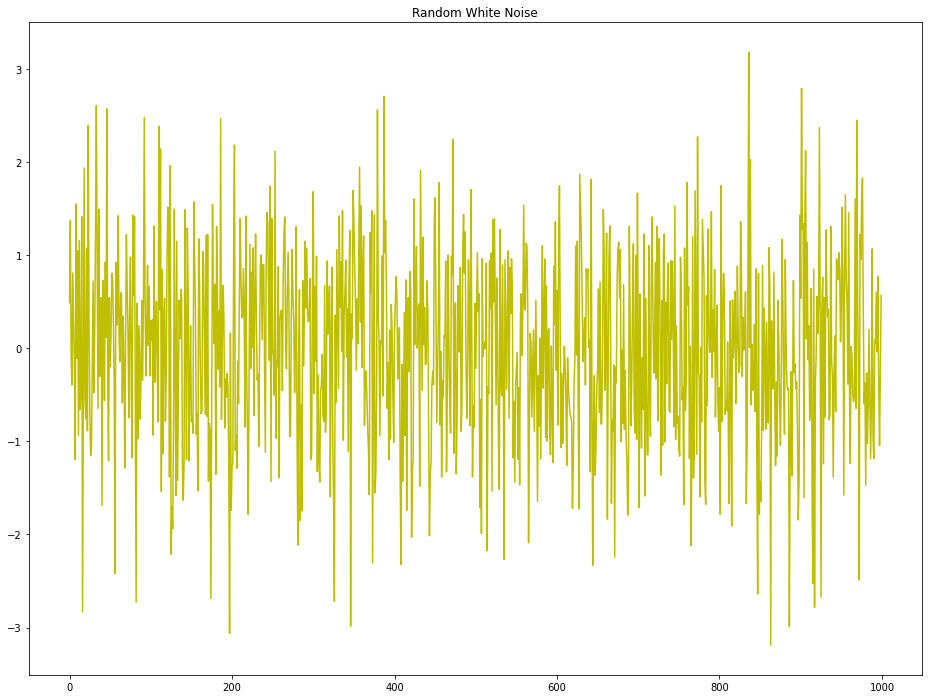

In [22]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='y')

# 13. Detrend a Time Series

* Detrending a time series means to remove the trend component from the time series. There are many approaches as listed below.

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model wirh the time steps as the predicator. For more complex trends, we may want to use quaddratic terms in the model
2. We subtract the trend component obtained from the time series decomposition.
3. Subtract the mean
4. Apply a filter like Baxter King filter (statmodels.tsa.filters.baxter) or the Hodrick-Prescott Filter (statmodels.tsa.filters.hpfilter) to remove moving average trend lines or the cyclical components

We shall impliment the first two meathods below.

Text(0.5, 1.0, 'Air Passengers detrended by Subtracting the least squares fit')

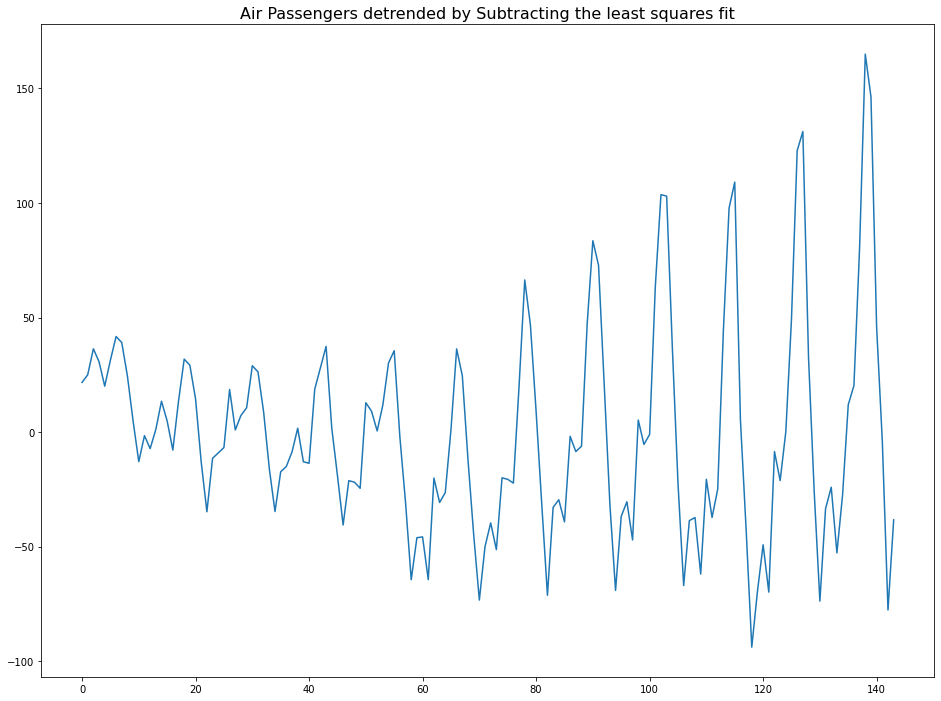

In [25]:
# Using SCIPY: Subtract the line of best fit

from scipy import signal
detrend=signal.detrend(data_df['No. of Passengers'].values)
plt.plot(detrend)
plt.title('Air Passengers detrended by Subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

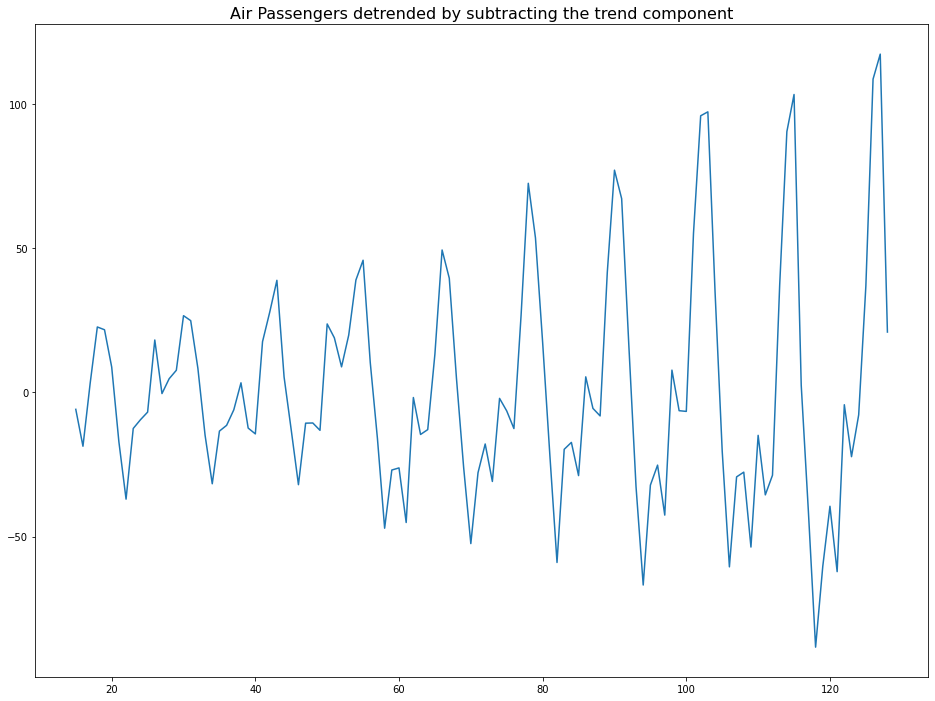

In [29]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(data_df['No. of Passengers'], model='multiplicative', freq=30)
detrended = data_df['No. of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

# 14. Deseasonalize a Time Series

Multiple approaches to deseasonalize:

1. Take moving averages with length as the seasonal window. This will smoothen in series in process
2. Seasonal difference the series.
3. Divide the series by the seasonal index obtained from STL decomposition.

If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

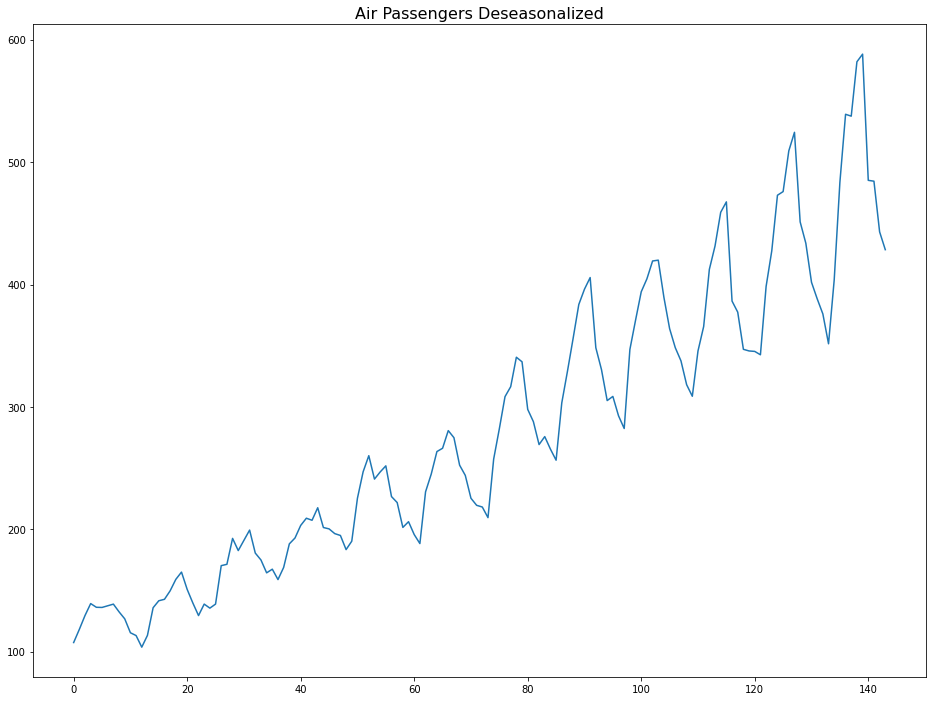

In [30]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(data_df['No. of Passengers'], model='multiplicative', freq=30)


# Deseasonalize
deseasonalized = data_df['No. of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# How to test for Seasonality of a Time Series?

The most common way to test for Seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calender

1. Hour of the Day
2. Day of the Month
3. Weekly
4. Monthly
5. Yearly

However, if we want a more definative inspection of the seasonality, use the **Autocorrelation Function(ACF) plot.** There is a strong seasonal pattern, the ACF plot usually reveals definative rpeeated spikes at multiples of the seasonal window. 

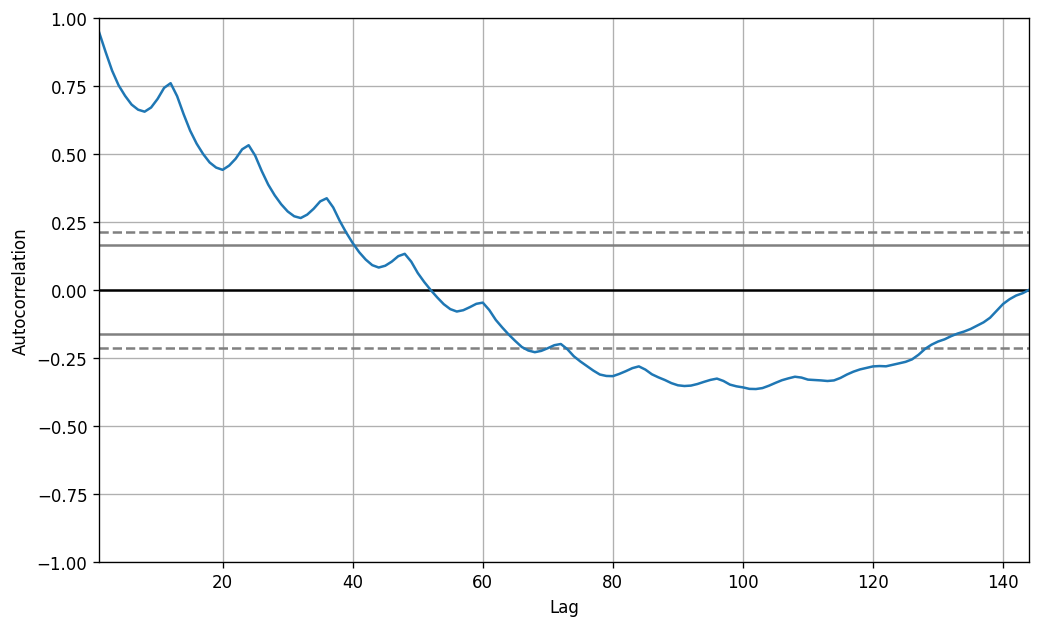

In [31]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data_df['No. of Passengers'].tolist())

Alternately, if we want a statistical test, the [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest) can determine if seasonal differencing is required to stationarize the series.

# 16. Autocorrealtion and Partial Autocorrelation Functions

* **Autocorrelation** is simply the corelation of a series with its own lags. If a series is significantly autocorelated, it means, the previous values of the series (lags) may be helpful in predictiong the current value.

* **Partial Autocorelation** also conveys similar information but it conveys the pure corelation of a series and its lags, exclusing the corelation contributions from the intermediate lags

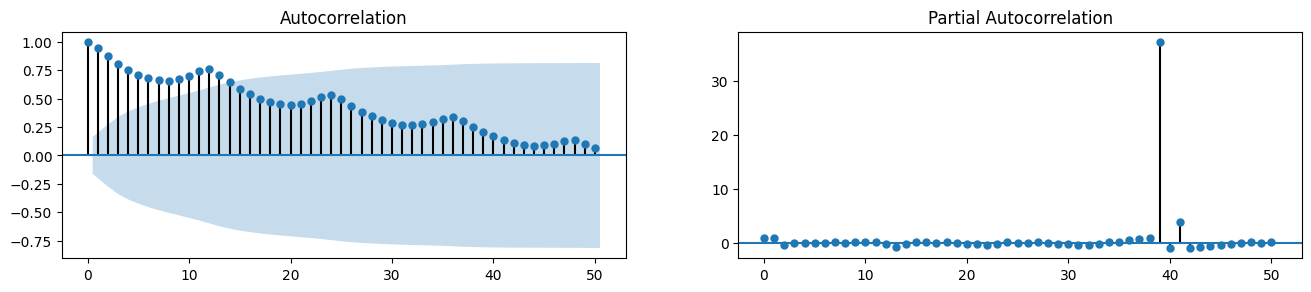

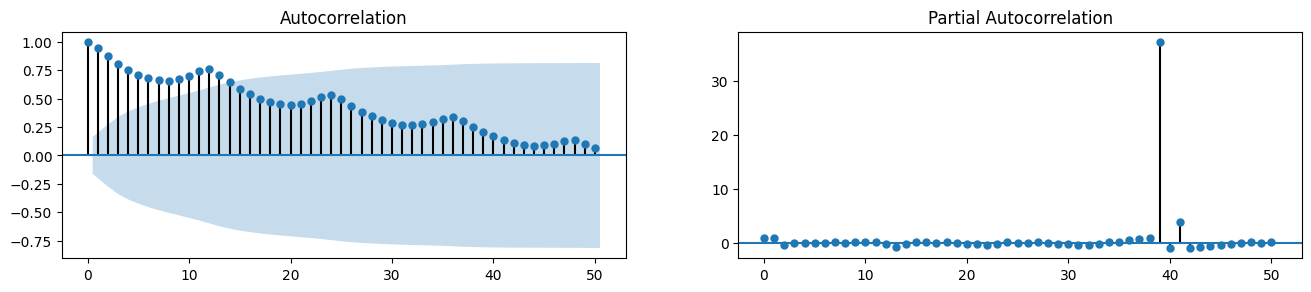

In [34]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_df['No. of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(data_df['No. of Passengers'].tolist(), lags=50, ax=axes[1])

# 17. Computation of Pqartial AutoCorelation Function

* The partial autocorelation function of lag(k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

* For instance, **Y_t** is the current series and **Y_t-1** is the lag 1 of Y, then the partial autocorelation of **lag 3 (Y_t-3)** is the coeddicient **α3** of Y_t-3 in the following equation:

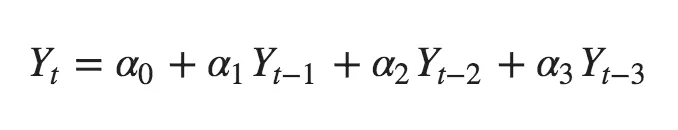

# 18. Lag Plots

* A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

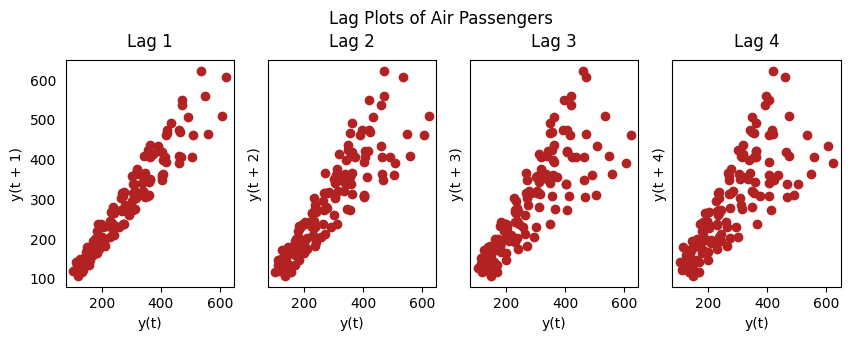

In [36]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data_df['No. of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

# 19. Granger Causality Test

* **Granger Causality Test** is used to determine if one time series will be useful to forecast another. It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

* So, Granger causality test should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only. It is implemented in the statsmodel package.

* It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column. The Null hypothesis is that the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then we reject the null hypothesis and conclude that the said lag of X is indeed useful. The second argument maxlag says till how many lags of Y should be included in the test.

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('air-passengers/AirPassengers.csv')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)

KeyError: ignored

# 20. Smoothening a Time Series

Smoothening of a time series may be useful in the following circumstances:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better.

We can smoothen a time series using the following methods:

* Take a moving average
* Do a LOESS smoothing (Localized Regression)
* Do a LOWESS smoothing (Locally Weighted Regression)

## Moving Average

Moving average is the average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.


## Localized Regression

LOESS, short for ‘Localized Regression’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

In [19]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/time-series-analysis-workbook


'https://jovian.ai/kartikaye-madhok/time-series-analysis-workbook'